<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-2/blob/main/Assignment/1107-Python-machine-learning-ch08-topic-modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **06. 토픽 모델링(Topic Modeling)**
- 토픽 모델링(Topic Modeling): 문서 집합에 숨어 있는 주제를 찾아내는 것
- 머신러닝 기반의 토픽 모델링을 적용해 숨어 있는 중요 주제를 효과적으로 찾아낼 수 있음
- 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출
- 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은 LSA(Latent Semantic Analysis)와 LDA(Latent Dirichlet Allocation)임
    - 이 절에서는 LDA만을 이용해 토픽 모델링을 수행
- 토픽 모델링에 사용되는 LDA와 앞서 차원 축소의 LDA(Linear Discriminant Analysis)는 약어만 같을 뿐 서로 다른 알고리즘이므로 유의하기 바람
- 토픽 모델링은 앞의 텍스트 분류에서 소개한 20 뉴스그룹 데이터 세트를 이용해 적용
    - 20가지의 주제 중 모토사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학의 8개 주제를 추출하고 이들 텍스트에 LDA 기반의 토픽 모델링을 적용
- 사이킷런은 LDA(Latent Dirichlet Allocation) 기반의 토픽 모델링을 LatentDirichletAllocation 클 래스로 제공
- 먼저 LDA 토픽 모델링을 위해 `fetch_20newsgroups()` API는 categories 파라미터를 통해 필요한 주제만 필터링해 추출하고 추출된 텍스트를 Count 기반으로 벡터화 변환
    - LDA는 Count 기반의 벡터화만 사용
    - max_features=1000으로 word 피처의 개수 제한

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. featch_20newsgroups()의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'),
                            categories=cats, random_state=0)

# LDA 는 Count기반의 벡터화만 적용 
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',
                             ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


- 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행
    - 토픽의 개수는 위의 뉴스그룹에서 추출한 주제와 동일한 8개로 정함
    - LatentDirichletAllocation 클래스의 n_components 파라미터를 이용해 이 토픽 개수를 조정

In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

- LatentDirichletAllocation.fit(데이터 세트)을 수행하면 LatentDirichletAllocation 객체는 components 속성값을 가지게 됨
    - n_components: 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치
    - 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 됨
- components_의 형태와 속성값 확인

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

&rarr; components_ array의 0번째 row, 10번째 col에 있는 값은 Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0에 연관되는 수치 값을 가지고 있음
- Ida_model.components_ 값만으로는 각 토픽별 word 연관도를 보기가 어려움
- `display topics()` 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 Word를 나열

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]
        
        # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## **08. 문서 유사도**

### 문서 유사도 측정 방법 - 코사인 유사도
- 문서와 문서 간의 유사도 비교는 일반적으로 코사인 유사도(Cosine Similarity)를 사용
- 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반함
- 코사인 유사도: 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

### 두 벡터 사잇각
- 두 벡터의 사잇각에 따라서 상호 관계는 유사하거나 관련이 없거나 아예 반대 관계가 될 수 있음
- 두 벡터 A와 B의 코사인 값 

$$A*B = \left\|A \right\| \left\|B \right\| cos\theta$$

- 유사도 $cos\theta$: 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것(즉, 내적 결과를 총 벡터 크기로 정규화(L2 Norm)한 것) 
$$ similarity = cos\theta = \frac{A\cdot B}{\left\|A \right\| \left\|B \right\|} = \frac{\sum_{i=1}^{n}A_iB_i}{\sqrt{\sum_{i=1}^{n}A_i^2}{\sum_{i=1}^{n}B_i^2}} $$

- 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유가 있음
    - 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉬움. 이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표(예를 들어 유클리드 거리 기반 지표)는 정확도가 떨어지기 쉬움
    - 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정 
한 비교를 할 수 없음

*간단한 문서에 대해서 서로 간의 문서 유사도를 코사인 유사도 기반으로 구해보기*
-  두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 `cos_similarity()` 함수를 작성

In [ ]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1,v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm  
    
    return similarity

- doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬 
로 변환

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


- 반환된 행렬은 희소 행렬이므로 앞에서 작성한 `cos_similarity()` 함수의 인자인 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환
- 위에서 작성한 `cos_similarity()` 함수를 이용해 두 개 문서의 유사도를 측정

In [ ]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환 
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


- 첫 번째 문장과 세 번째 문장, 그리고 두 번째 문장과 세 번째 문장의 유사도 측정

In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


- 사이킷런은 코사인 유사도를 측정하기 위해 `sklearn.netrics.pairwise.cosine_similarity` API를 제공함
- 이를 이용해 앞 예제의 문서 유사도 측정
    - `cosine_similarity()` 함수는 두 개의 입력 파라미터를 받음
        - 첫 번째 파라미터: 비교 기준이 되는 문서의 피처 행렬
        - 두 번째 파라미터: 비교되는 문서의 피처 행렬
    - `cosine_similarity()`는 희소 행렬, 밀집 행렬 모두가 가능하며, 행렬 또는 배열 모두 가능
    - 앞에서 만든 `cos_similarity()` 함수와 같이 별도의 변환 작업이 필요 없음
- 첫 번째 문서와 비교해 바로 자신 문서인 첫 번째 문서, 그리고 두 번째, 세 번째 문서의 유사도 측정

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


- `cos_similarity()`는 쌍으로(pair) 코사인 유사도 값을 제공할 수 있음
- 모든 개별 문서에 쌍으로 코사인 유사도 값 계산

In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정
- 앞 절의 문서 군집화에서 사용한 Opinion Review 데이터 세트를 이용해 이들 문서 간의 유사도를 측정
- 데이터 세트를 새롭게 DataFrame으로 로드하고 문서 군집화 적용

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
import pandas as pd
import glob ,os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/ESAA/data/OpinosisDataset1.0/topics/'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
document_df.head()

,filename,opinion_text,cluster_label
0,display_garmin_nuvi_255W_gps,...,0
1,battery-life_netbook_1005ha,...,0
2,battery-life_ipod_nano_8gb,...,0
3,buttons_amazon_kindle,...,0
4,eyesight-issues_amazon_kindle,...,0


In [ ]:
for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

In [ ]:
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

- 이전 절에서 해당 문서의 군집화는 전자제품, 호텔, 자동차를 주제로 군집화됐음
- 이 중 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 알아보도록 함
- 각 문서가 피처 벡터화된 데이터를 `cosisne_simularity()`를 이용해 상호 비교해 유사도를 확인
- 먼저 이를 위해 호텔을 주제로 군집화된 데이터를 먼저 추출하고 이 데이터에 해당하는 TfidfVectorizer의 데이터를 추출
    - 호텔 군집화 데이터를 기반으로 별도의 TF-IDF 벡터화를 수행하지 않고, 바로 위에서 TfidfVectorizer로 만들어진 데이터에서 그대로 추출

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫번째 문서를 추출하여 파일명 표시  
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 군집화된 feature_vect 추출 
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Int64Index([  5,  12,  13,  14,  16,  18,  23,  24,  31,  32,  34,  39,  41,
             42,  48,  50,  56,  63,  64,  65,  67,  69,  74,  75,  82,  83,
             85,  90,  92,  93,  99, 101],
           dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.11647    0.05767559 0.06149824 0.06120386 0.37749083
  0.51347429 0.0696747  0.3229833  0.11197205 0.05153712 0.13844638
  0.09430907 0.03577622 0.13722165 0.04239125 1.         0.11647
  0.05767559 0.06149824 0.06120386 0.37749083 0.51347429 0.0696747
  0.3229833  0.11197205 0.05153712 0.13844638 0.09430907 0.03577622
  0.13722165 0.04239125]]


- 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화
    - `cosine_similarity()`는 쌍 형태의 ndarray를 반환하므로 이를 판다스 인덱스로 이용하기 위해 reshape(-1)로 차원을 변경

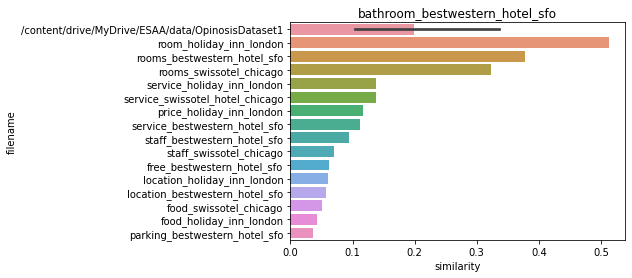

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외 
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬 
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용하여 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename',data=hotel_1_sim_df)
plt.title(comparison_docname)
plt.show()

## **09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

### 한글 NLP 처리의 어려움
- 일반적으로 한글 언어 처리는 영어 등의 라틴어 처리보다 어렵움. 그 주된 원인은 띄어쓰기'와 '다 양한 조사' 때문임
    - 한글은 띄어쓰기를 잘못하면 의미가 왜곡되어 전달될 수 있음
    - 조사는 주어나 목적어를 위해 추가되며, 워낙 경우의 수가 많기 때문에 어근 추출(Stemming/Lemmatization) 등의 전처리 시 제거하기가 까다로움

### KoNLPy 소개
- KoNLPy: 파이썬의 대표적인 한글 형태소 패키지
- 형태소 분석(Morphological analysis): 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업
- KoNLPy는 기존의 C/C++, Java로 잘 만들어진 한글 형태소 엔진을 파이썬 래퍼(Wrapper) 기반으로 재작성한 패키지임
- 기존의 엔진은 그대로 유지한 채 파이썬 기반에서 인터페이스를 제공하기 때문에 검증된 패키지의 안정성을 유지할 수 있음
    - 꼬꼬마(Kkma), 한나눔(Hannanum), Komoran, 은전한닢 프로젝트(Mecab), Twitter와 같이 5개의 형 태소 분석 모듈을 모두 사용 가능
    - 안타깝게도 뛰어난 형태소 분석으로 인정받고 있는 Mecab의 경우는 윈도우 환경에서는 구동되지 않음

### 데이터 로딩
- 테스트 데이터가 별도로 있으니 이를 이용해 평가
- 먼저 ratings_train.txt 파일을 DataFrame으로 로딩하고 데이터 살펴보기

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/ESAA/data/ratings_train.txt', sep='\t')
train_df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


- 학습 데이터 세트의 0과 1의 Label 값 비율 살펴보기(1이 긍정, 0이 부정 감성)

In [2]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

- train df의 경우 리뷰 텍스트를 가지는 document 칼럼에 Null이 일부 존재하므로 이 값은 공백으로 변환
- 문자가 아닌 숫자의 경우 단어적인 의미로 부족하므로 파이썬의 정규 표현식 모듈인 re를 이용해 이 역시 공백으로 변환
- 테스트 데이터 세트의 경우도 파일을 로딩하고 동일한 데이터 가공 수행

In [3]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함) 
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA/data/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True) 
test_df.drop('id', axis=1, inplace=True)

- TF-IDF 방식으로 단어를 벡터화할 텐데, 먼저 각 문장을 한글 형태소 분석을 통해 형태소 
단어로 토큰화
- 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스를 이용
    - Twitter 객체의 `morphs()` 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환
- 문장을 형태소 단어 형태로 반환하는 별도의 tokenizer 함수를 `tw_tokenizer()`라는 이름으로 생성
    - 뒤에서 사이킷런의 TfidVectorizer 클래스의 tokenizer로 사용됨

In [92]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 40.4 MB/s 
     |████████████████████████████████| 465 kB 35.0 MB/s 


In [4]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


- 사이킷런의 TfidfVectorizer를 이용해 TF-IDF 피처 모델을 생성
    - tokenizer는 위에서 만든 `tw_tokenizer()` 함수 이용

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2) 
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


- 로지스틱 회귀를 이용해 분류 기반의 감성 분석 수행

In [6]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행 
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용 
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf, param_grid=params , cv=3 ,scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 3.5} 0.8593


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


- 테스트 세트를 이용해 최종 감성 분석 예측을 수행
    - 앞 절의 텍스트 분류 절에서도 말 
한 것처럼 테스트 세트를 이용해 예측할 때는 학습할 때 적용한 TfidfVectorizer를 그대로 사용해야 함
    - 그래야만 학습 시 설정된 TfidfVectorizer의 피처 개수와 테스트 데이터를 TficfVectorizer로 변환할 피처 개수가 같아짐

In [7]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86186
